In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
#1. Data Collection
    #Gather relevant data from various sources (databases, APIs, web scraping, etc.).
    #Ensure the dataset is large and diverse enough to represent the problem domain.

In [65]:
# Load Dataset
data_path = 'all_exoplanets_2021.csv'  # Update path if necessary
df = pd.read_csv(data_path)
df.head(4)

,No.,Planet Name,Planet Host,Num Stars,Num Planets,Discovery Method,Discovery Year,Discovery Facility,Orbital Period Days,Orbit Semi-Major Axis,...,Equilibrium Temperature,Spectral Type,Stellar Effective Temperature,Stellar Radius,Stellar Mass,Stellar Metallicity,Stellar Metallicity Ratio,Stellar Surface Gravity,Distance,Gaia Magnitude
0,1,11 Com b,11 Com,2,1,Radial Velocity,2007,Xinglong Station,326.03000,1.29,...,NaN,G8 III,4742.0,19.00,2.70,-0.35,[Fe/H],2.31,93.1846,4.44038
1,2,11 UMi b,11 UMi,1,1,Radial Velocity,2009,Thueringer Landessternwarte Tautenburg,516.21997,1.53,...,NaN,NaN,4213.0,29.79,2.78,-0.02,[Fe/H],1.93,125.3210,4.56216
2,3,14 And b,14 And,1,1,Radial Velocity,2008,Okayama Astrophysical Observatory,185.84000,0.83,...,NaN,K0 III,4813.0,11.00,2.20,-0.24,[Fe/H],2.63,75.4392,4.91781
3,4,14 Her b,14 Her,1,2,Radial Velocity,2002,W. M. Keck Observatory,1773.40002,2.93,...,NaN,NaN,5338.0,0.93,0.90,0.41,[Fe/H],4.45,17.9323,6.38300


In [67]:
#Data Cleaning & Preprocessing
    #Handle missing values (remove or impute them).
    #Remove duplicates and irrelevant features.
    #Handle outliers and inconsistencies.
    #Convert categorical data into numerical format (one-hot encoding, label encoding).
    #Normalize or standardize numerical features if needed.

In [69]:
df.isnull().sum()

No.                                 0
Planet Name                         0
Planet Host                         0
Num Stars                           0
Num Planets                         0
Discovery Method                    0
Discovery Year                      0
Discovery Facility                  0
Orbital Period Days               162
Orbit Semi-Major Axis            1812
Mass                             2569
Eccentricity                     2868
Insolation Flux                  4205
Equilibrium Temperature          3650
Spectral Type                    3647
Stellar Effective Temperature     349
Stellar Radius                    447
Stellar Mass                      731
Stellar Metallicity              1371
Stellar Metallicity Ratio        1383
Stellar Surface Gravity           603
Distance                          104
Gaia Magnitude                    175
dtype: int64

In [77]:
#Standardize column names
df.columns = df.columns.str.lower().str.replace(" ", "_").str.strip()
print("Dataset Columns:\n", df.columns)

Dataset Columns:
 Index(['no.', 'planet_name', 'planet_host', 'num_stars', 'num_planets',
       'discovery_method', 'discovery_year', 'discovery_facility',
       'orbital_period_days', 'orbit_semi-major_axis', 'mass', 'eccentricity',
       'insolation_flux', 'equilibrium_temperature', 'spectral_type',
       'stellar_effective_temperature', 'stellar_radius', 'stellar_mass',
       'stellar_metallicity', 'stellar_metallicity_ratio',
       'stellar_surface_gravity', 'distance', 'gaia_magnitude'],
      dtype='object')


In [79]:
# Handle missing values
#df['equilibrium_temperature'] = df['equilibrium_temperature'].fillna(df['equilibrium_temperature'].median())
#df['mass'] = df['mass'].fillna(df['mass'].median())  # Handling missing mass values
#df['insolation_flux'] = df['insolation_flux'].fillna(df['insolation_flux'].median())  # Handling missing insolation flux values

# Remove rows where 'orbital_period_days' has null values
#df_cleaned = df[df['orbital_period_days'].notna()]
print(df.isnull().sum())

no.                                 0
planet_name                      4575
planet_host                      4575
num_stars                           0
num_planets                         0
discovery_method                 4575
discovery_year                      0
discovery_facility               4575
orbital_period_days               162
orbit_semi-major_axis            1812
mass                             2569
eccentricity                     2868
insolation_flux                  4205
equilibrium_temperature          3650
spectral_type                    4575
stellar_effective_temperature     349
stellar_radius                    447
stellar_mass                      731
stellar_metallicity              1371
stellar_metallicity_ratio        4575
stellar_surface_gravity           603
distance                          104
gaia_magnitude                    175
dtype: int64


In [91]:
# Select numeric columns
df_numeric = df[['orbital_period_days', 'mass', 'equilibrium_temperature', 'insolation_flux']]

# Apply KNN imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed_numeric = pd.DataFrame(imputer.fit_transform(df_numeric), columns=df_numeric.columns)

# If 'discovery_method' is categorical or non-numeric, handle it separately or retain the original column
df['discovery_method'] = df['discovery_method']  # Retain the original 'discovery_method' column

# Combine imputed numeric columns with the original 'discovery_method'
df_imputed = pd.concat([df_imputed_numeric, df[['discovery_method']]], axis=1)



In [85]:
#3. Exploratory Data Analysis (EDA)
   #Visualize data distributions using histograms, scatter plots, and box plots.
   #Identify patterns, correlations, and trends in the data.
   #Use statistical analysis (mean, median, standard deviation, etc.).

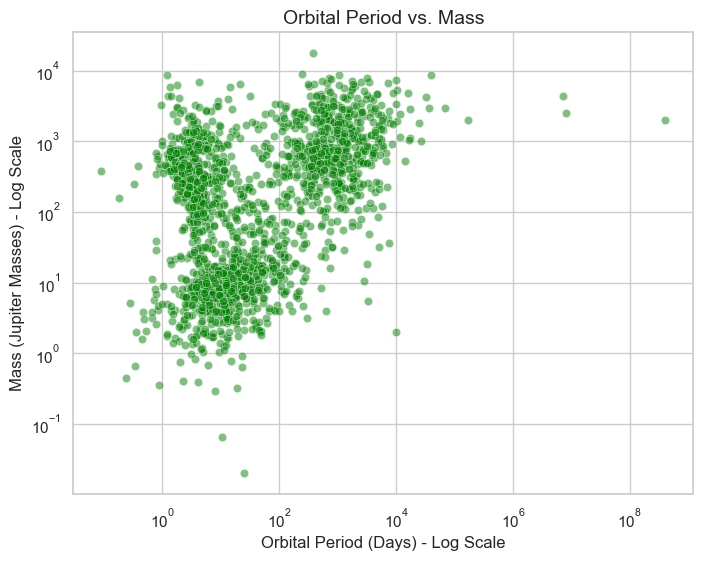

In [49]:
# Figure 3: Orbital Period vs. Mass (log-log scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Orbital Period Days"], y=df["Mass"], alpha=0.5, color="green")
plt.xscale("log")
plt.yscale("log")
plt.title("Orbital Period vs. Mass", fontsize=14)
plt.xlabel("Orbital Period (Days) - Log Scale")
plt.ylabel("Mass (Jupiter Masses) - Log Scale")
plt.show()

/var/folders/sl/vq1yb_j914g7ws4rwcd8f4pm0000gn/T/ipykernel_82171/3915594440.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["Discovery Method"], order=df["Discovery Method"].value_counts().index, palette="coolwarm")


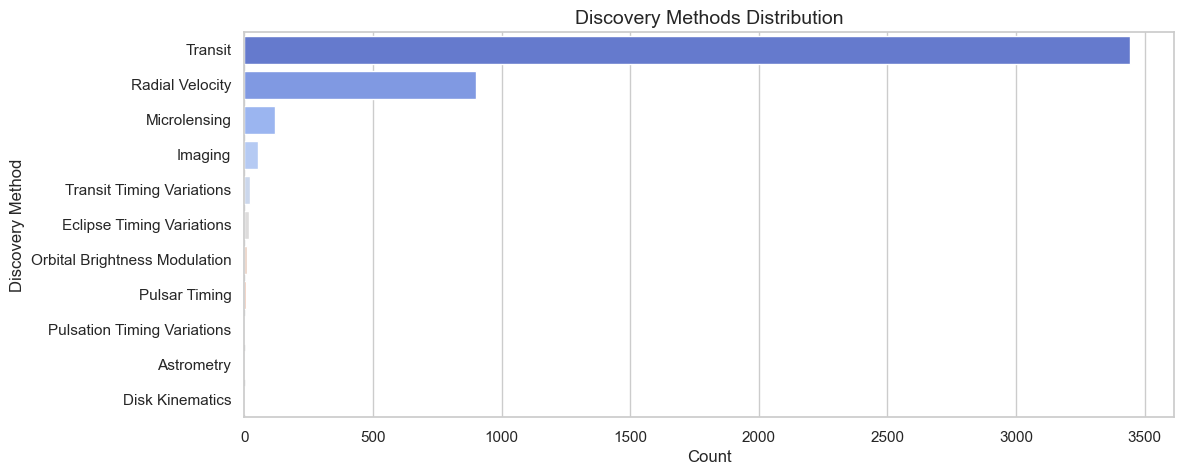

In [51]:
# Set style
sns.set(style="whitegrid")

# Figure 1: Discovery Methods Distribution
plt.figure(figsize=(12, 5))
sns.countplot(y=df["Discovery Method"], order=df["Discovery Method"].value_counts().index, palette="coolwarm")
plt.title("Discovery Methods Distribution", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Discovery Method")
plt.show()

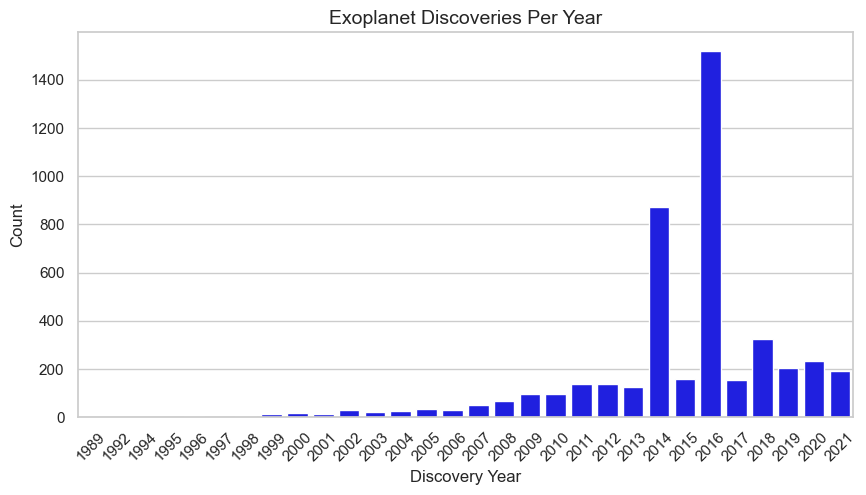

In [53]:
# Figure 4: Number of Exoplanets Discovered Per Year
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Discovery Year"], color="blue")
plt.xticks(rotation=45)
plt.title("Exoplanet Discoveries Per Year", fontsize=14)
plt.xlabel("Discovery Year")
plt.ylabel("Count")
plt.show()

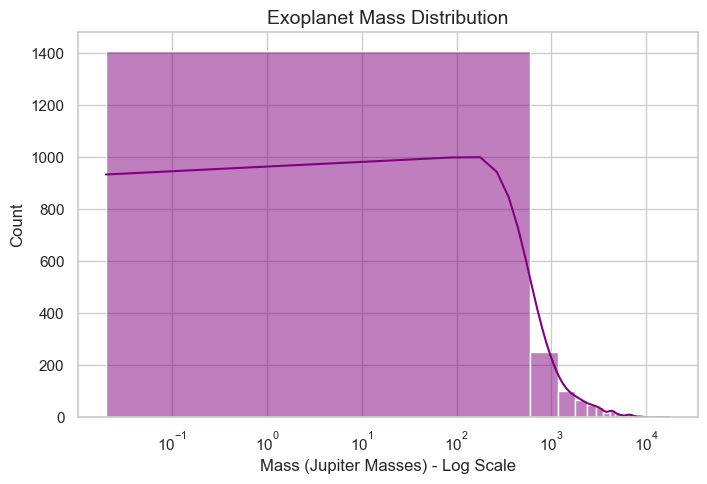

In [55]:
# Figure 2: Exoplanet Mass Distribution (log scale for better visualization)
plt.figure(figsize=(8, 5))
sns.histplot(df["Mass"].dropna(), bins=30, kde=True, color="purple")
plt.xscale("log")
plt.title("Exoplanet Mass Distribution", fontsize=14)
plt.xlabel("Mass (Jupiter Masses) - Log Scale")
plt.ylabel("Count")
plt.show()

In [ ]:
#Feature Engineering
    #Select the most relevant features (Feature Selection).
   #Create new meaningful features (Feature Extraction).
   #Reduce dimensionality (PCA, LDA, t-SNE).

In [93]:
# Select relevant features (Modify as needed based on dataset content)
selected_features = ['orbital_period_days', 'mass', 'equilibrium_temperature', 'insolation_flux']
label_column = 'discovery_method'  # Modify based on dataset

In [95]:
print("mass null : ",df['mass'].isna().sum())
print("orbital_period_days null : ", df['orbital_period_days'].isna().sum())

mass null :  2569
orbital_period_days null :  162


In [97]:
# Ensure selected features exist
missing_features = [col for col in selected_features + [label_column] if col not in df.columns]
if missing_features:
    print("Missing columns:", missing_features)
else:
    print("All selected features exist.")

All selected features exist.


In [99]:
#5. Splitting the Dataset
    #Split the data into Training, Validation, and Test sets (e.g., 70-20-10 or 80-20).

In [101]:
# Encoding categorical labels
le = LabelEncoder()
df[label_column] = le.fit_transform(df[label_column])

In [103]:
# Define features (X) and target (y)
X = df[selected_features]
y = df[label_column]

In [105]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
#6. Choosing a Machine Learning Model
   #Select the appropriate algorithm based on the problem type:
   #Supervised Learning (Regression, Classification)
   #Unsupervised Learning (Clustering, Anomaly Detection)
   #Reinforcement Learning (Decision-making tasks)

In [109]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       915

    accuracy                           1.00       915
   macro avg       1.00      1.00      1.00       915
weighted avg       1.00      1.00      1.00       915



In [ ]:
#8. Model Evaluation
#Measure model performance using metrics like:
#Classification: Accuracy, Precision, Recall, F1-score, AUC-ROC.
#Regression: RMSE, MAE, R² score.
#Perform cross-validation to check for overfitting.


In [ ]:
# Logistic Regression Classifier
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.8421052631578947
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.86      0.92      0.89        13

    accuracy                           0.84        19
   macro avg       0.83      0.79      0.81        19
weighted avg       0.84      0.84      0.84        19



In [ ]:
# XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7894736842105263
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.80      0.92      0.86        13

    accuracy                           0.79        19
   macro avg       0.78      0.71      0.73        19
weighted avg       0.78      0.79      0.78        19



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [03:48:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Neural Network Model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(len(np.unique(y)), activation='softmax')
])

nn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

# Neural Network Evaluation
y_pred_nn = np.argmax(nn_model.predict(X_test), axis=1)
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.7251 - loss: 0.6606 - val_accuracy: 0.7778 - val_loss: 0.7766
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8244 - loss: 0.6492 - val_accuracy: 0.7778 - val_loss: 0.6799
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8403 - loss: 0.5884 - val_accuracy: 0.7778 - val_loss: 0.6131
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8368 - loss: 0.5636 - val_accuracy: 0.7778 - val_loss: 0.5367
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8521 - loss: 0.5184 - val_accuracy: 0.7778 - val_loss: 0.4778
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8573 - loss: 0.4949 - val_accuracy: 0.7778 - val_loss: 0.4258
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8536 - loss: 0.4519 - val_accuracy: 0.8889 - val_loss: 0.3853
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8215 - loss: 0.4433 - val_accuracy: 0.8889 - val_loss: 0.3541
Epoch 9/50


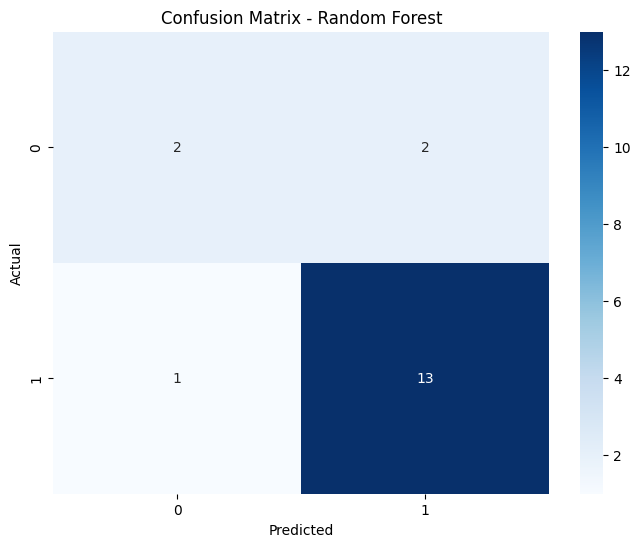

In [ ]:
# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
